# Mnist Number Classification

* Mnist dataset consists of handwritten numbers from 0-9 | 60000 training data | 10000 test data
* Each datapoint is 28*28px | greyscale | 0-255
* Here's the original author's notebook: https://www.kaggle.com/code/enesztrk/mnist-dataset-classification-with-deep-learning

## Library

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
import random

## Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Train Images shape: ", train_images.shape)
print("Test images shape: ", test_images.shape)

Train Images shape:  (60000, 28, 28)
Test images shape:  (10000, 28, 28)


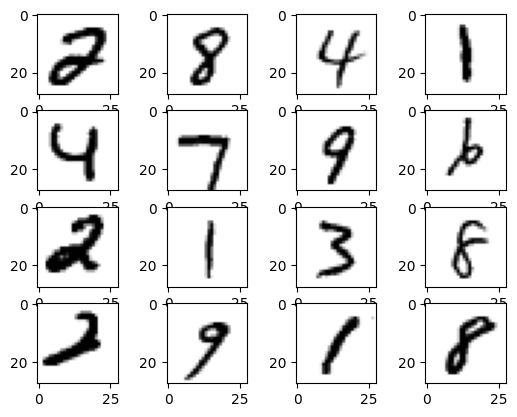

In [3]:
# What the data looks like?
x = 4
y = 4
fig, ax = plt.subplots(x,y)
for row in range(x):
    for col in range(y):
        ax[row,col].imshow(train_images[random.randint(1,1000)], cmap="gray_r")


## Preparing Data

The data shape is currently (60000, 28, 28). We want it to be (60000, 28, 28, 1)

We also want to normalize the values. Currently the pixel values go from [0,255] so we normalize it to [0,1]

In [4]:
# 3D -> 4D

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

print("Train Images shape now: ", train_images.shape)
print("Test images shape now: ", test_images.shape)

# Normalization

train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images = train_images / 255
test_images = test_images / 255

Train Images shape now:  (60000, 28, 28, 1)
Test images shape now:  (10000, 28, 28, 1)


In [5]:
input_shape = train_images.shape[1:]
input_shape

(28, 28, 1)

## Creating The Network

In [6]:
model = keras.Sequential([
    layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## Fitting The Model

In [7]:
history = model.fit(
    train_images, train_labels,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2073 - accuracy: 0.9374
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0805 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0587 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0455 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0291 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0270 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0220 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0187 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

## Evaluating Model

In [8]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0681 - accuracy: 0.9841
Test loss:  0.06807601451873779
Test Accuracy:  0.9840999841690063


Looks pretty good to me! 98.4% accuracy!

In [9]:
history_keys = history.history.keys()
print("Keys: ", history_keys)

Keys:  dict_keys(['loss', 'accuracy'])


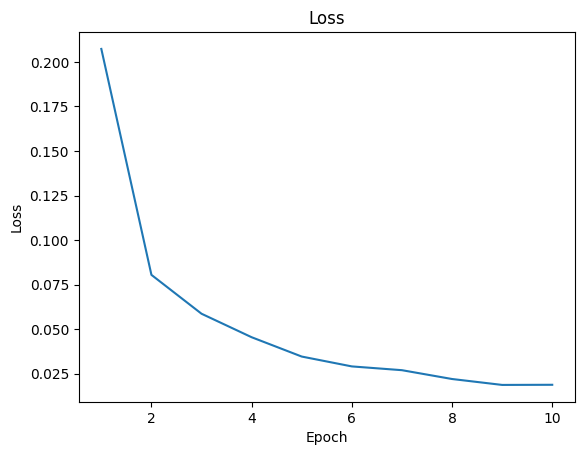

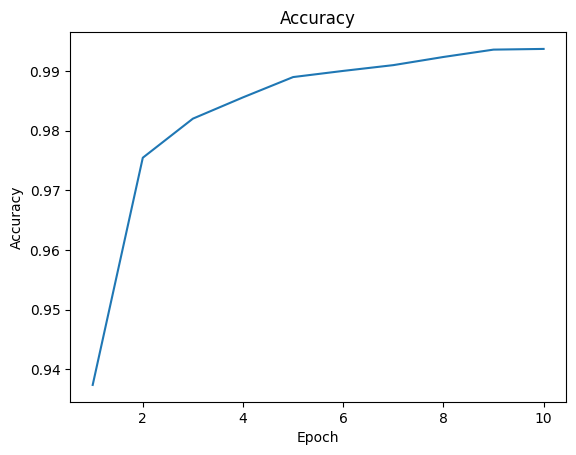

In [10]:
epochs = range(1, 11)
loss = history.history["loss"]
accuracy = history.history["accuracy"]

plt.plot(epochs, loss)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(epochs, accuracy)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [11]:
# Saving model for use
model.save("mnist_model.h5")

## Predictions

1/1 [==============================] - 0s 31ms/step
Predicted Number:  2


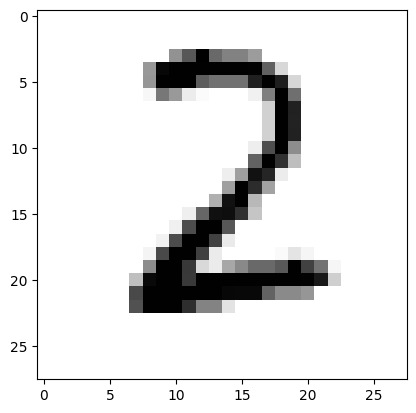

In [31]:
model = models.load_model("mnist_model.h5")
i = random.randint(1,5000)
prediction = model.predict(test_images[i].reshape(1,28,28,1))
print("Predicted Number: ", prediction.argmax())
plt.imshow(test_images[i], cmap="gray_r")
plt.show()